# Homework 1: Boston Housing Price Prediction
Rand Hidayah, uni: rgh2124

Based on the Data Set: https://www.kaggle.com/c/boston-housing (https://www.kaggle.com/c/bostonhousing) 

Homework Prompt:
- (25 pts) Describe the data:
    - What missing values are there?
    - What are the summary statistics of the numerical features?
    - What do the distributions of the features look like?
- (25 pts) What features are most correlated with housing price?
- (25 pts) Generate a new feature based on the existing dataset that you think would help explain housing prices and plot its relationship with housing price.
- (25 pts) With scikit-learn, develop a model with the training data and make predictions on the test data. Plot your predictions.

Please submit your final work as a Jupyter notebook. Upload it to Courseworks.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import scipy as scp
import seaborn as sns

In [98]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing


**Getting to know my data.**

In [32]:
train_data = pd.read_csv('train.csv')
# train_data
train_data.shape

(333, 15)

In [33]:
test_data = pd.read_csv('test.csv')
test_data.shape

(173, 14)

In [34]:
train_data.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

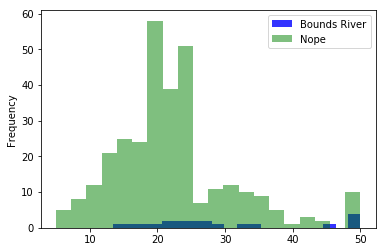

In [38]:
chas_1 = train_data[train_data["chas"] == 1]
chas_0 = train_data[train_data["chas"] == 0]
chas_1["medv"].plot.hist(alpha=0.8, color="blue", bins=20)
chas_0["medv"].plot.hist(alpha=0.5, color="green", bins=20)
plt.legend(['Bounds River', 'Nope'])
plt.show()

# **What missing values are there?** 

In [30]:
train_data.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

There are no missing values in my training data. Which is great. According to: https://goo.gl/ShB4En, there are several ways to deal with missing data in data sets. However, we'll just be happy with having none in the training data. I will repeat the above steps for the testing data as well.

In [7]:
test_data = pd.read_csv('test.csv')
# train_data
display(test_data.shape) # to get Jupyter to show me these things in one output
display(test_data.dtypes)
display(test_data.isnull().sum())

(173, 14)

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
dtype: object

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

Again no missing data in my data set as shown by the last array called by pandas.isnull().


Note that the test and train data devides the combined dtata in half.

In [8]:
combined_data_frames = [train_data, test_data]
combined_data = pd.concat(combined_data_frames)

# **What are the summary statistics of the numerical features?**

I want to look at means and standrad deviations, ranges and percentiles.

In [9]:
train_data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,258.404624,4.100862,12.661850,10.835145,0.086705,0.549981,6.321237,69.245665,3.958865,9.387283,406.231214,18.469942,351.299711,12.917977
std,143.289788,10.607761,24.536277,6.596488,0.282219,0.117826,0.700621,28.248244,2.324131,8.662621,164.480626,2.196196,99.781464,7.293408
min,3.000000,0.013810,0.000000,0.460000,0.000000,0.392000,4.138000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,136.000000,0.082210,0.000000,5.320000,0.000000,0.447000,5.895000,42.800000,2.010700,4.000000,279.000000,17.000000,371.720000,6.870000
50%,268.000000,0.251990,0.000000,8.560000,0.000000,0.538000,6.223000,79.200000,3.421100,5.000000,330.000000,19.100000,390.070000,12.120000
75%,381.000000,3.673670,20.000000,18.100000,0.000000,0.624000,6.674000,94.600000,5.400700,24.000000,666.000000,20.200000,396.060000,17.210000
max,505.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000


None of the data seems to be of a mixed type (numeral and alphanumeral). All data is numeric but we have some ordinal values.  crim, zn, indus, nox, rm, age, dis, tax, ptratio, black, lstat, medv are ration type numerical data. chas is categorical ordinal.

Some other aspects we can look at for statistics are normality and homegenity of the data set, just in case that comes up in a consideration a later on. Since we have a sample size of about 400 samples, Shapiro-Wilkes can be used for these tests of normality and Leven can be used for tests of homogeinety, in case statistics are needed later.

In [10]:
columnList = list(train_data)

In [11]:
def testShapiroDF(df1, df2, columnin):
    tdf1 = df1[columnin]
    tdf2 = df2[columnin]
    w, p = stats.shapiro(tdf1-tdf2)
    if p < 0.05 :
        normRes = 'not normally distributed'
    else:
        normRes = 'normally distributed'
    
    ShapiroWilkesRes = print(columnin, 'is', normRes)
    return ShapiroWilkesRes
    

In [12]:
columnList = list(train_data)

In [70]:
for item in columnList:
    if item == 'ID':
        next
    else:
        testShapiroDF(train_data, test_data, item)

crim is normally distributed
zn is normally distributed
indus is normally distributed
chas is normally distributed
nox is normally distributed
rm is normally distributed
age is normally distributed
dis is normally distributed
rad is normally distributed
tax is normally distributed
ptratio is normally distributed
black is normally distributed
lstat is normally distributed


In [14]:
def testLevenesDF(df1, df2, columnin):
    tdf1 = df1[columnin]
    tdf2 = df2[columnin]
    w, p = stats.levene(tdf1, tdf2)
    if p < 0.05 :
        homogRes = 'not homogeneous'
    else:
        homogRes = 'homogenous'
    LevRes = print(columnin, 'is', homogRes)
    return LevRes

In [15]:
for item in columnList:
    if item == 'ID':
        next
    else:
        testLevenesDF(train_data, test_data, item)

crim is homogenous
zn is homogenous
indus is homogenous
chas is homogenous
nox is homogenous
rm is homogenous
age is homogenous
dis is homogenous
rad is homogenous
tax is homogenous
ptratio is homogenous
black is homogenous
lstat is homogenous


This shows me that the variances are homoegenous and the data is normally distributed in both sets of training and testing data. These tests can be redone on specific subgroups of any datat set (groups of rows with similar indexes). I did this to familirize myself with the data and see what the general descriptive statistical overview of both dtata frame slook like for each variable. 

# **What do the distributions of the features look like?**

In [16]:
columnList = list(train_data)

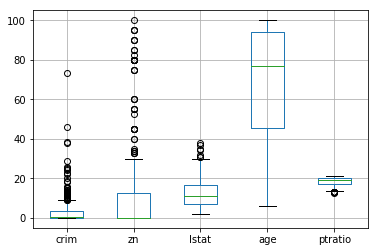

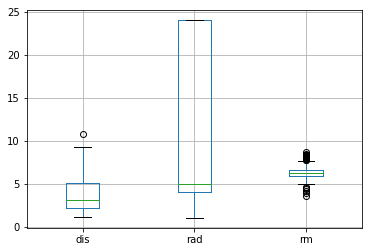

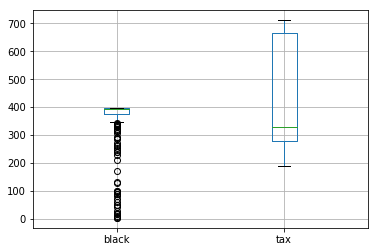

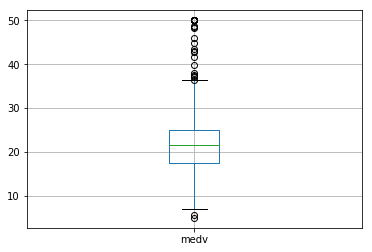

In [40]:
train_data.boxplot(column=['crim', 'zn', 'lstat', 'age', 'ptratio'])
plt.figure()
train_data.boxplot(column=['dis', 'rad', 'rm'])
plt.figure()
train_data.boxplot(column=['black', 'tax',])
plt.figure()
train_data.boxplot(column=['medv'])

Crime and Zone are variables which range from 0-X. The other variables follow a typical distribution aorund some mean or median. We note that there are outliers in the per capita crime rate by town, zoned land, rooms per dwelling and proportion of african-americans by town. Radial highways accessiblity, taxes and age also seem to show a non-typical skewed distribution. This is a first pass loook at the data and what the datat set looks like before I start delving into the features and aspeocts of what's happening.

From the above data and the normality tests, we can see that while both sets of trianing data are more or less homogeneously variant and normally distributed, but within our training data we do have outliers for certain features. I want to take a little bot of a closer look at those outliers in the four feautres 'crim', 'black', 'zn' and 'rm'

In [41]:
train_data.loc[train_data.crim > 15 ]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
248,375,18.4982,0.0,18.1,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
249,377,15.2880,0.0,18.1,0,0.671,6.649,93.3,1.3449,24,666,20.2,363.02,23.24,13.9
253,385,20.0849,0.0,18.1,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
254,387,24.3938,0.0,18.1,0,0.700,4.652,100.0,1.4672,24,666,20.2,396.90,28.28,10.5
255,388,22.5971,0.0,18.1,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,7.4
261,399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
262,401,25.0461,0.0,18.1,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
264,404,24.8017,0.0,18.1,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3
267,414,28.6558,0.0,18.1,0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3
268,415,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0


In [42]:
train_data.loc[(train_data.rm > 8) ^ (train_data.rm < 5)]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
99,148,2.36862,0.0,19.58,0,0.8710,4.926,95.7,1.4608,5,403,14.7,391.71,29.53,14.6
110,164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
142,205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
153,225,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
154,226,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
155,227,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
159,233,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
160,234,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
173,254,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
176,263,0.52014,20.0,3.97,0,0.6470,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8


In [43]:
train_data.loc[train_data.zn > 44]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
22,40,0.02763,75.0,2.95,0,0.4280,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
23,41,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
34,55,0.01360,75.0,4.00,0,0.4100,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
35,56,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
36,57,0.02055,85.0,0.74,0,0.4100,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
37,58,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6
43,66,0.03584,80.0,3.37,0,0.3980,6.290,17.8,6.6115,4,337,16.1,396.90,4.67,23.5
44,67,0.04379,80.0,3.37,0,0.3980,5.787,31.1,6.6115,4,337,16.1,396.90,10.24,19.4
131,188,0.07875,45.0,3.44,0,0.4370,6.782,41.1,3.7886,5,398,15.2,393.87,6.68,32.0
132,190,0.08370,45.0,3.44,0,0.4370,7.185,38.9,4.5667,5,398,15.2,396.90,5.39,34.9


In [44]:
train_data.loc[train_data.black < 350 ]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
12,19,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
17,28,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.28,14.8
20,35,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307,21.0,248.31,20.34,13.5
69,103,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
79,119,0.13058,0.0,10.01,0,0.547,5.872,73.1,2.4775,6,432,17.8,338.63,15.37,20.4
91,135,0.97617,0.0,21.89,0,0.624,5.757,98.4,2.3460,4,437,21.2,262.76,17.31,15.6
98,146,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8
103,154,2.14918,0.0,19.58,0,0.871,5.709,98.5,1.6232,5,403,14.7,261.95,15.79,19.4
104,155,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
105,157,2.44668,0.0,19.58,0,0.871,5.272,94.0,1.7364,5,403,14.7,88.63,16.14,13.1


I also would like to really look at what the lowest and highest valued properties are.

In [48]:
train_data.loc[train_data.medv < 10 ]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
253,385,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
255,388,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,7.4
258,393,11.57790,0.0,18.10,0,0.700,5.036,97.0,1.7700,24,666,20.2,396.90,25.68,9.7
261,399,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
262,401,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
263,402,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666,20.2,396.90,20.32,7.2
264,404,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3
268,415,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
269,416,18.08460,0.0,18.10,0,0.679,6.434,100.0,1.8347,24,666,20.2,27.25,29.05,7.2
271,419,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8


In [49]:
 train_data.loc[train_data.medv > 35]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
3,5,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
35,56,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
109,162,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
110,164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
113,167,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
125,180,0.05780,0.0,2.46,0,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04,37.2
126,181,0.06588,0.0,2.46,0,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8
127,182,0.06888,0.0,2.46,0,0.4880,6.144,62.2,2.5979,3,193,17.8,396.90,9.45,36.2
128,183,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82,37.9
130,187,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0


Nothing really jumps out to me at this point, a correlation matrix for all the features would actually make more sense with the amount of features in this dataset.

# What features are most correlated with housing price?

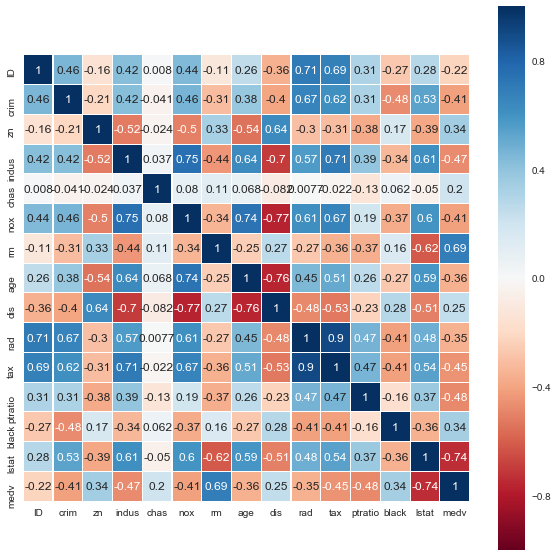

In [55]:
numerical_column = ['int64','float64'] #select only numerical features to find correlation
plt.figure(figsize=(10,10))
sns.heatmap(
    train_data.select_dtypes(include=numerical_column).corr(),
    cmap=plt.cm.RdBu,
    vmax=1.0,
    linewidths=0.1,
    linecolor='white',
    square=True,
    annot=True )

I see that the strongest correlation is actually strongly negatively correlated with 'lstat' lower status of the population (percent), and highly correlated with 'rm' average number of rooms per dwelling.

We have negative correlations with:
- nox nitrogen oxides concentration (parts per 10 million).
- indus proportion of non-retail business acres per town.
- tax full-value property-tax rate per $10,000.
- ptratio pupil-teacher ratio by town.
- rad index of accessibility to radial highways.
-crim per capita crime rate by town.

We have positive correlations with:
- dis weighted mean of distances to five Boston employment centres.
- zn proportion of residential land zoned for lots over 25,000 sq.ft.
- chas Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).


<Figure size 720x720 with 0 Axes>

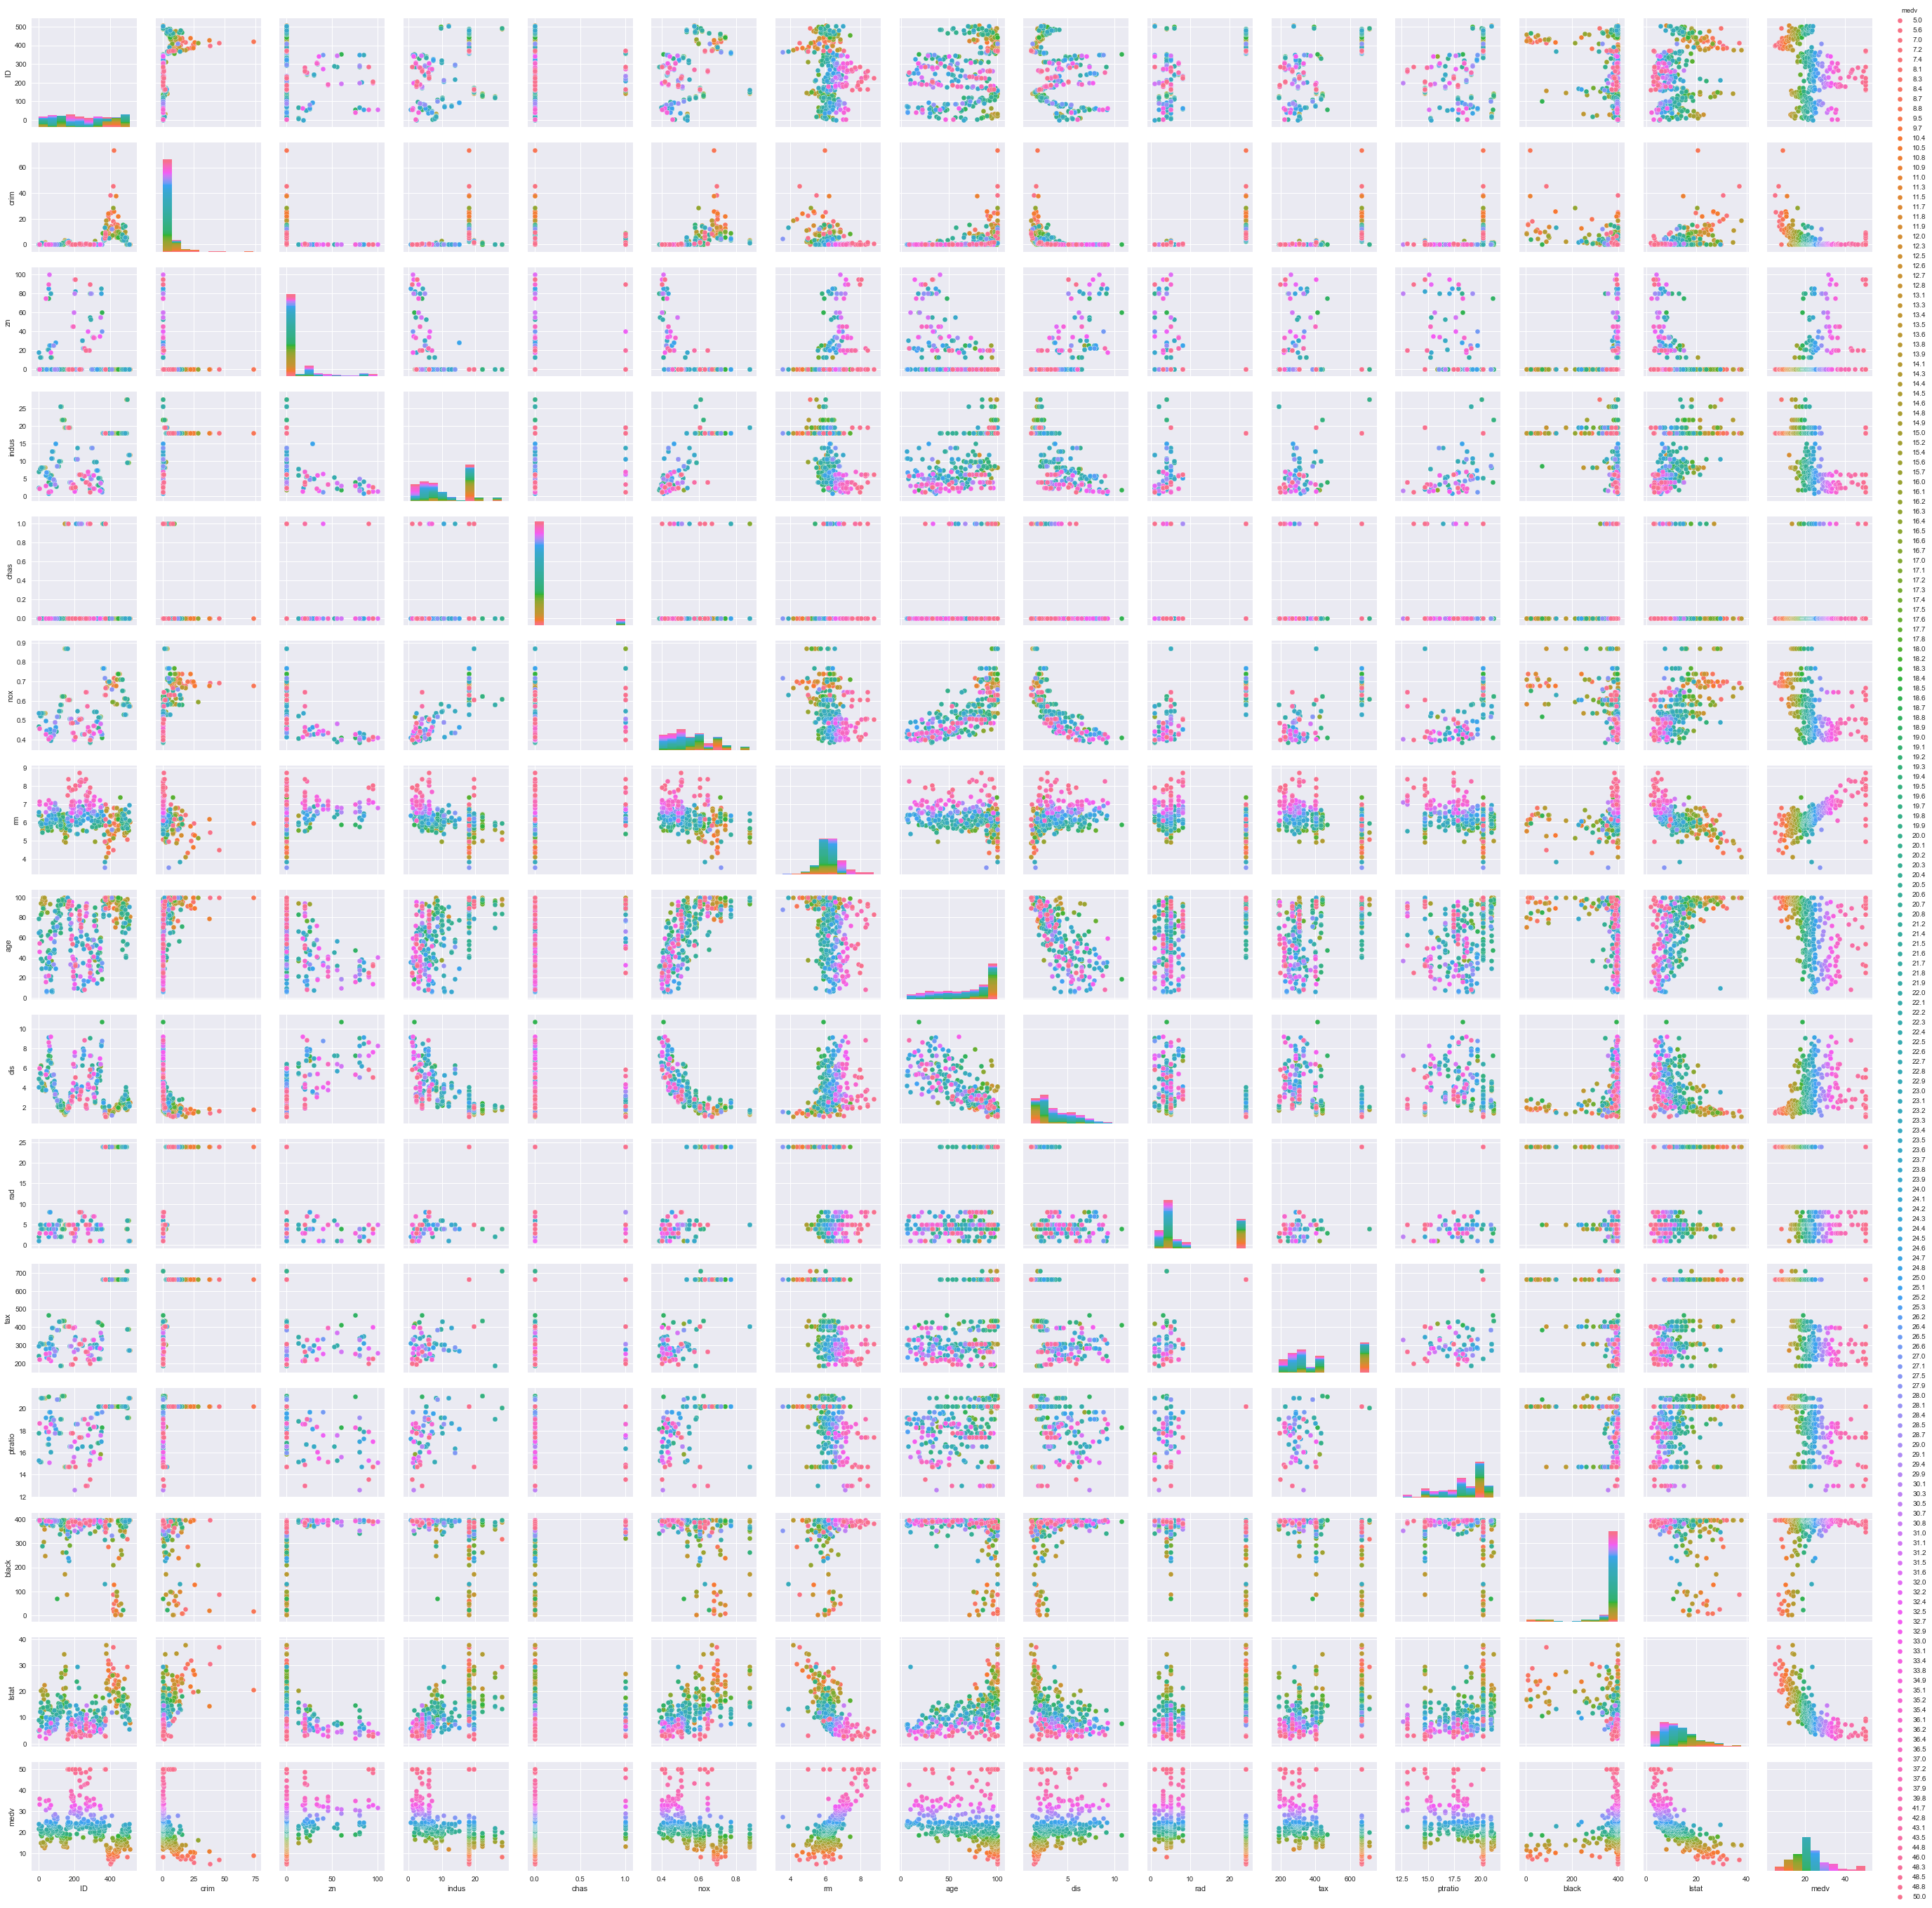

In [60]:
plt.figure(figsize=(10,10))
sns.pairplot(train_data.select_dtypes(include=numerical_column), hue = 'medv')

# Generate a new feature based on the existing dataset that you think would help explain housing prices and plot its relationship with housing price.

I'm going to use average number of rooms per dwelling, tax value, charles river index and crime as features as a simple feature generator to plot the relationship with price. I will classify them into ranges but the charles river index is kep as a 0 or 1.

In [79]:
prices = train_data['medv']
features = train_data.drop(['medv','ID'], axis = 1)

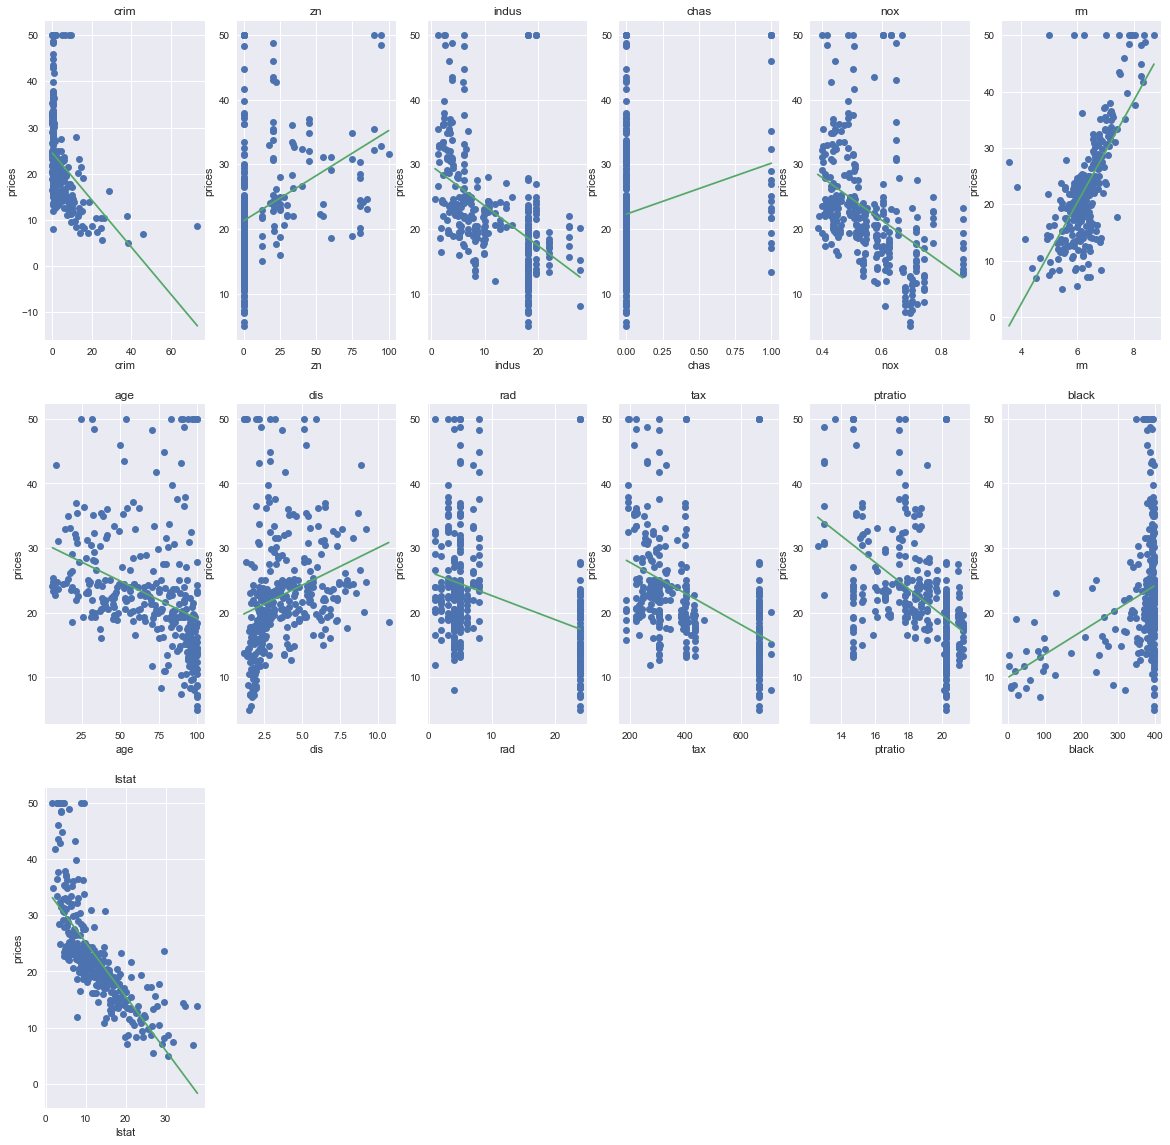

In [94]:
plt.figure(figsize=(20, 20))

# i: index
for i, col in enumerate(features.columns):
    plt.subplot(3, 6, i+1)
    x = train_data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

# With scikit-learn, develop a model with the training data and make predictions on the test data. Plot your predictions.

Since I know a lot of the data is skewed, and this : https://www.kaggle.com/prasadperera/the-boston-housing-dataset suggests cleaning the data with a log transformation., I'll start with that.

In [106]:
med_data =  np.log1p(med_data)
for col in columnList:
    if np.abs(train_data[col].skew()) > 0.3:
        train_data[col] = np.log1p(train_data[col])

I found a tutorial for a simple linear regression model and decided to implement it. I'm looking for 3-4% error overall.

In [119]:
min_max_scaler = preprocessing.MinMaxScaler()
x = features
y = prices
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=columnList[1:])

med_data =  np.log1p(med_data)
for col in columnList:
    if np.abs(train_data[col].skew()) > 0.3:
        train_data[col] = np.log1p(train_data[col])

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=90)
min_max_scaler = preprocessing.MinMaxScaler()
td_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


C:\Users\randh\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MSE: -0.00 (+/- 0.00)
MSE: -1.14 (+/- 2.84)
MSE: -0.34 (+/- 0.67)


C:\Users\randh\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  linewidth = mpl.rcParams["lines.linewidth"]


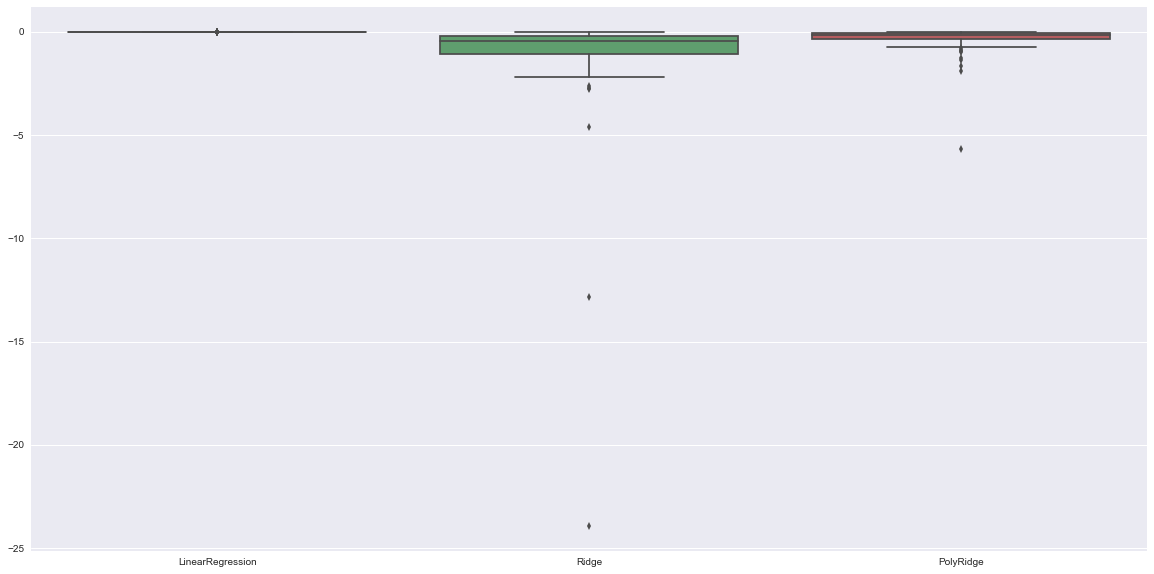

In [120]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)